# 处理wine数据集，第二组数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

读入数据

In [2]:
filename='C:/Users/lyxto/code/wine-reviews/winemag-data-130k-v2.csv'
df=pd.read_csv(filename)

输出格式

In [3]:
cols = df.columns
print(df.shape)
print(cols)

(129971, 14)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


## 之后几段是标称属性的频数统计
下面统计每个province的频数

In [4]:
cname='province'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

province
Achaia                                 5
Aconcagua Costa                       27
Aconcagua Valley                     116
Aegean                                22
Agioritikos                            3
Ahr                                    9
Alenquer                               7
Alentejano                           937
Alentejo                             182
Alenteo                                1
Algarve                                9
Alsace                              2440
America                               95
Amindeo                                2
Amyndeon                               5
Andalucia                            189
Ankara                                18
Apalta                                12
Arcadia                                1
Arizona                               41
Armenia                                2
Atalanti Valley                       14
Atlantida                              5
Attica                                 6
Austral

下面统计每个country的频数

In [5]:
cname='country'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4472
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


属性region_1中每个值的频数

In [6]:
cname='region_1'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

region_1
Abruzzo                                                  6
Adelaida District                                      110
Adelaide                                                16
Adelaide Hills                                         107
Adelaide Plains                                          4
Aglianico d'Irpinia                                      1
Aglianico del Beneventano                                2
Aglianico del Taburno                                   13
Aglianico del Vulture                                   90
Agrelo                                                  50
Albana di Romagna                                        7
Alcamo                                                   7
Aleatico dell'Elba                                       1
Alella                                                  24
Alexander Valley                                       784
Alghero                                                  4
Alicante                                       

属性region_2中每个值的频数

In [7]:
cname='region_2'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

region_2
California Other      2663
Central Coast        11065
Central Valley        1062
Columbia Valley       8103
Finger Lakes          1777
Long Island            680
Napa                  6814
Napa-Sonoma           1169
New York Other         231
North Coast            584
Oregon Other           727
Sierra Foothills      1462
Sonoma                9028
South Coast            272
Southern Oregon        917
Washington Other       534
Willamette Valley     3423
dtype: int64


属性variety中每个值的频数

In [8]:
cname='variety'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

variety
Abouriou                                   3
Agiorgitiko                               63
Aglianico                                359
Aidani                                     1
Airen                                      3
Albana                                    23
Albanello                                  1
Albariño                                 477
Albarossa                                  2
Aleatico                                   5
Alfrocheiro                               16
Alicante                                   5
Alicante Bouschet                         50
Aligoté                                   30
Alsace white blend                        51
Altesse                                    8
Alvarelhão                                 2
Alvarinho                                137
Alvarinho-Chardonnay                       5
Ansonica                                   2
Antão Vaz                                 17
Apple                                      2
Ar

属性winery中每个值的频数

In [9]:
cname='winery'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

winery
1+1=3                                                       6
10 Knots                                                    4
100 Percent Wine                                            3
1000 Stories                                                2
1070 Green                                                  1
10Span                                                      4
12 Linajes                                                  8
12C Wines                                                   5
13 Celsius                                                  1
14 Hands                                                   67
16X20                                                       2
1752 Signature Wines                                        1
1789 Wines                                                  1
181                                                         1
18401 Cellars                                               5
1848 Winery                                                 6
1

## 下面统计数值属性的相关信息以及可视化
下面是points属性，没有缺失值

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64
缺失值个数： 0


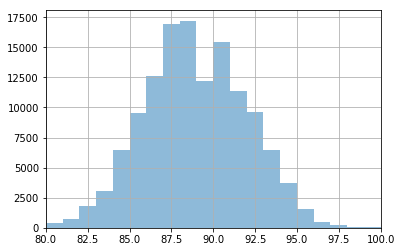

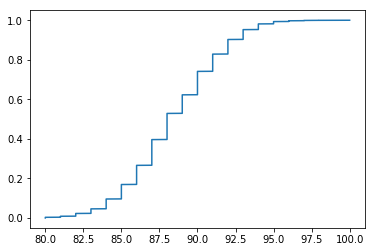

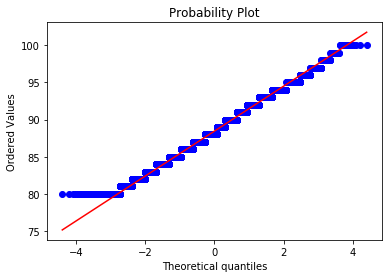

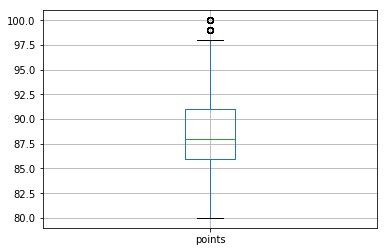

In [10]:
cname='points'
print(df[cname].describe())
loss=len(df)-df[cname].count()
print("缺失值个数：",loss)
#直方图绘制
plt.xlim(80,100)
df[cname].hist(alpha=0.5,bins=20)
plt.show()
#累计分布图绘制
x=np.sort(df[cname])
y=np.arange(len(x))/float(len(x))
plt.plot(x,y)
plt.show()
#QQ图绘制
#x_label = stats.norm.ppf(y)
#plt.scatter(x_label, x)
#plt.show()
stats.probplot(df[cname], dist="norm", plot=plt)
plt.show()
#盒图绘制
a=DataFrame(df,columns=[cname])
a.boxplot()
plt.show()


下面是price属性
首先是将缺失部分去除

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64
缺失值个数： 8996


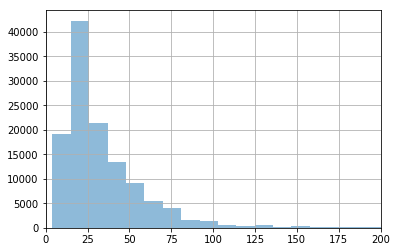

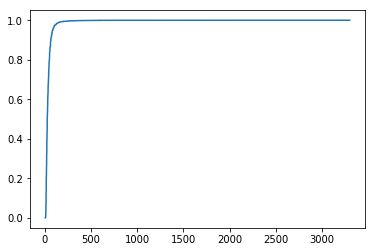

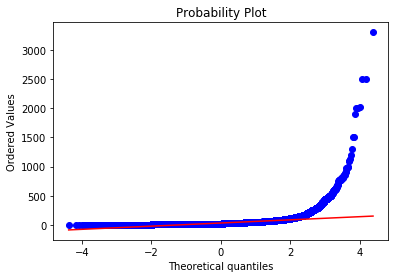

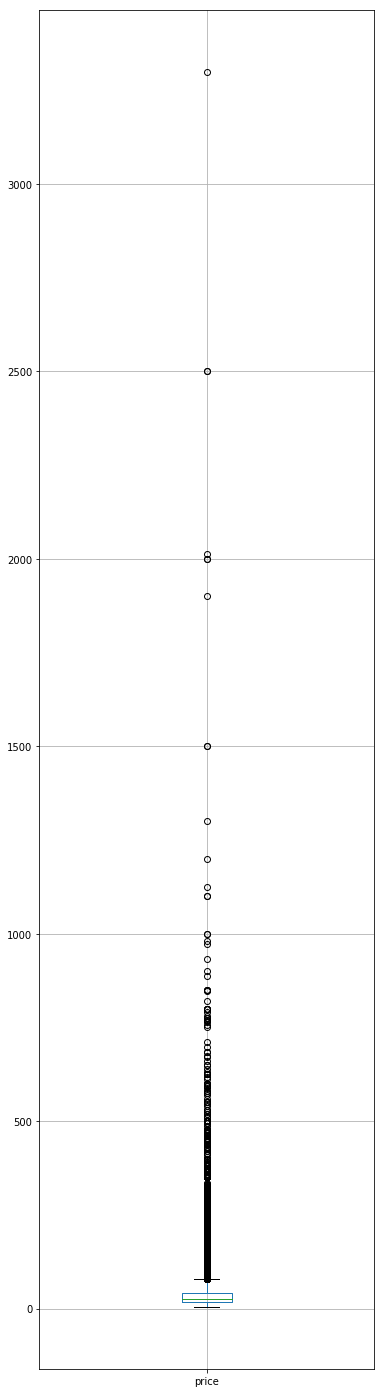

In [11]:
cname='price'
a=DataFrame(df,columns=[cname])
a=a.dropna()#去除缺失值
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)
#直方图绘制
plt.xlim(0,200)
a[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()
#QQ图绘制
#x_label = stats.norm.ppf(y)
#plt.scatter(x_label, x)
#plt.show()
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()
#盒图绘制
a.boxplot(figsize=(6,25))
plt.show()

用最高频率值来填补缺失值

众数:
    price
0   20.0
count    129971.000000
mean         34.300005
std          39.768715
min           4.000000
25%          18.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


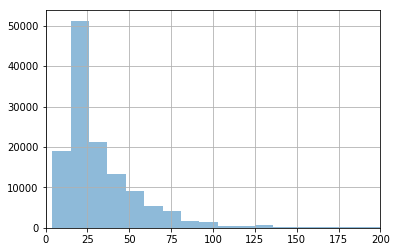

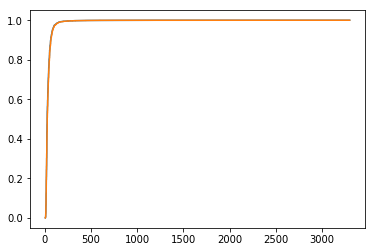

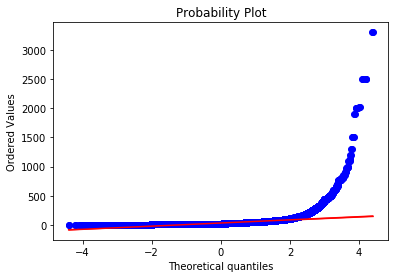

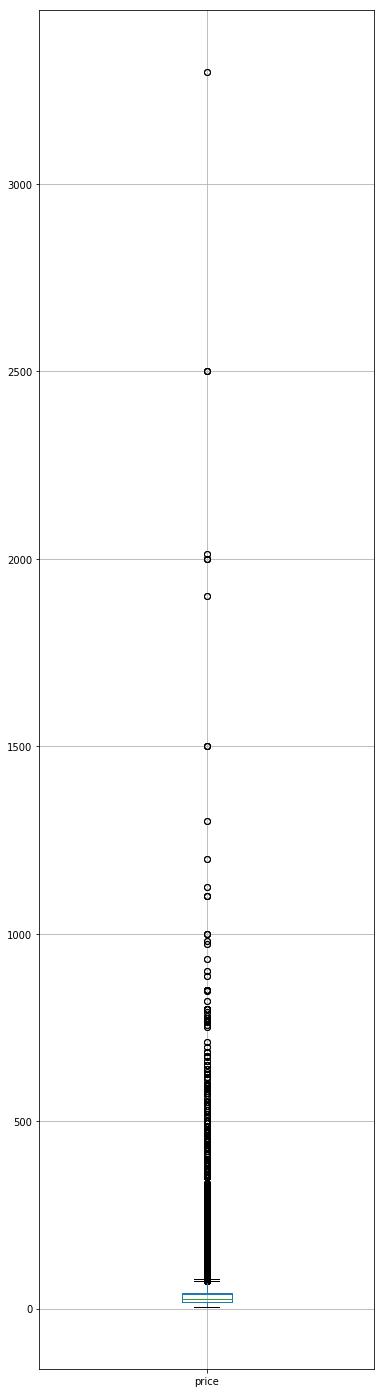

In [12]:
#求众数

mode=a.mode()
print("众数:\n",mode)
#用众数替换缺失值
b=DataFrame(df,columns=[cname])
b=b.fillna(20)
#替换后的数据分析
print(b[cname].describe())
#直方图
plt.xlim(0,200)
b[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图
x2=np.sort(b[cname])
y2=np.arange(len(x2))/float(len(x2))
plt.plot(x2,y2)
plt.plot(x1,y1)
plt.show()
#QQ图
stats.probplot(b[cname], dist="norm", plot=plt)
stats.probplot(a[cname], dist="norm", plot=plt)

plt.show()
#盒图
b.boxplot(figsize=(6,25))
a.boxplot(figsize=(6,25))
plt.show()


通过属性的相关关系来填补缺失值

In [13]:
print(df.corr())
linreg = LinearRegression()
liby=df.dropna(subset=[cname])
y=liby[[cname]]
zty=df[['country','price','points']]
print(zty.shape)
liby = pd.get_dummies(zty)
liby= liby.astype('float')

            Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004823
points        0.007124  1.000000  0.416167
price         0.004823  0.416167  1.000000
(129971, 3)


In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)

In [15]:
known_price = liby[liby.price.notnull()].as_matrix()
unknown_price = liby[liby.price.isnull()].as_matrix()
y = known_price[:, 0:1]
X = known_price[:, 1:50]
print(X.shape)
#z=unknown_price[:,0:49]
rfr.fit(X, y)
predictedprice = rfr.predict(unknown_price[:, 1:50])
ans=df
ans.loc[(ans.price.isnull()),'price'] = predictedprice

C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


(120975, 44)


(129971, 1)
count    129971.000000
mean         35.646632
std          40.748286
min           4.000000
25%          17.584704
50%          26.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64


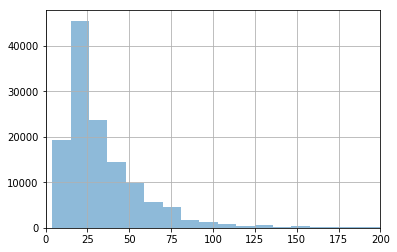

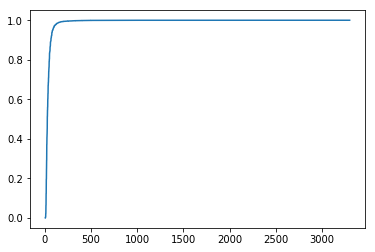

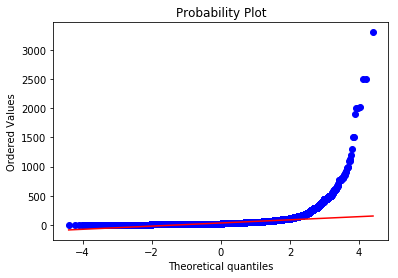

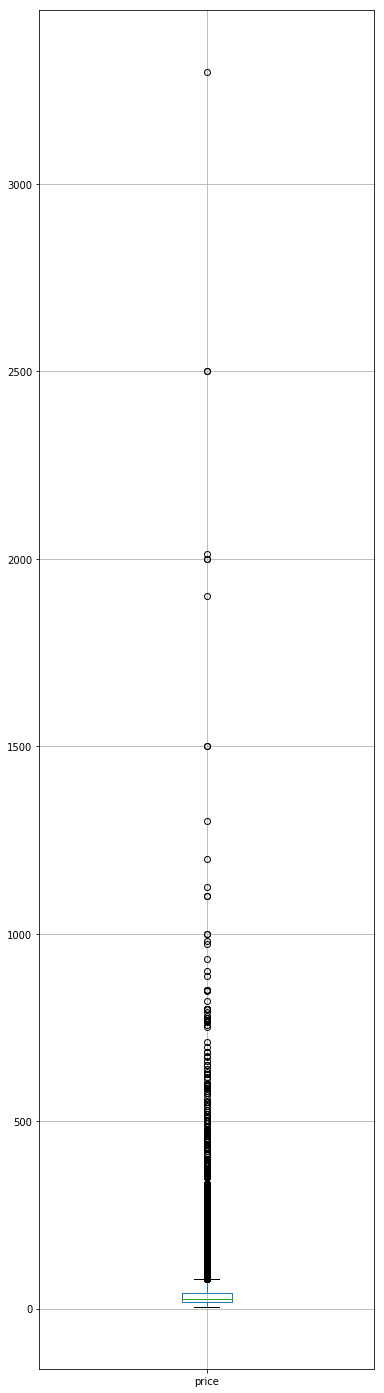

In [16]:
cname='price'
c=DataFrame(ans,columns=[cname])
print(c.shape)
print(c[cname].describe())
#直方图
plt.xlim(0,200)
c[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图
x3=np.sort(c[cname])
y3=np.arange(len(x2))/float(len(x2))
plt.plot(x3,y3)
plt.show()
#QQ图
stats.probplot(c[cname], dist="norm", plot=plt)
plt.show()
#盒图
c.boxplot(figsize=(6,25))
plt.show()

通过数据对象之间的相似性来填补缺失值

In [17]:
ans=zty.sort_values(["points","country"],inplace=False,ascending=True)
ansk=ans
while len(ans)!=len(ans.dropna()):
    ans=ans.fillna(method="bfill")
ans1= ans['price'].as_matrix()
while len(ansk)!=len(ansk.dropna()):
    ansk=ansk.fillna(method='ffill')
ans2= ansk['price'].as_matrix()
ans3=(ans2+ans1)/2

C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    129971.000000
mean         35.764978
std          42.240387
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64


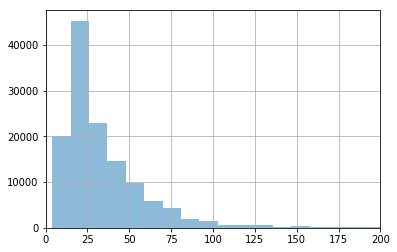

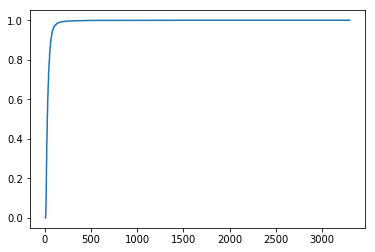

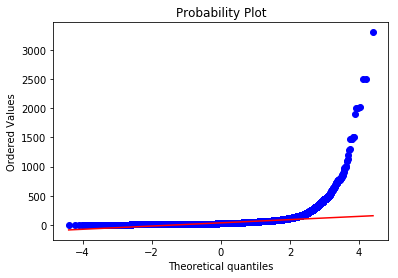

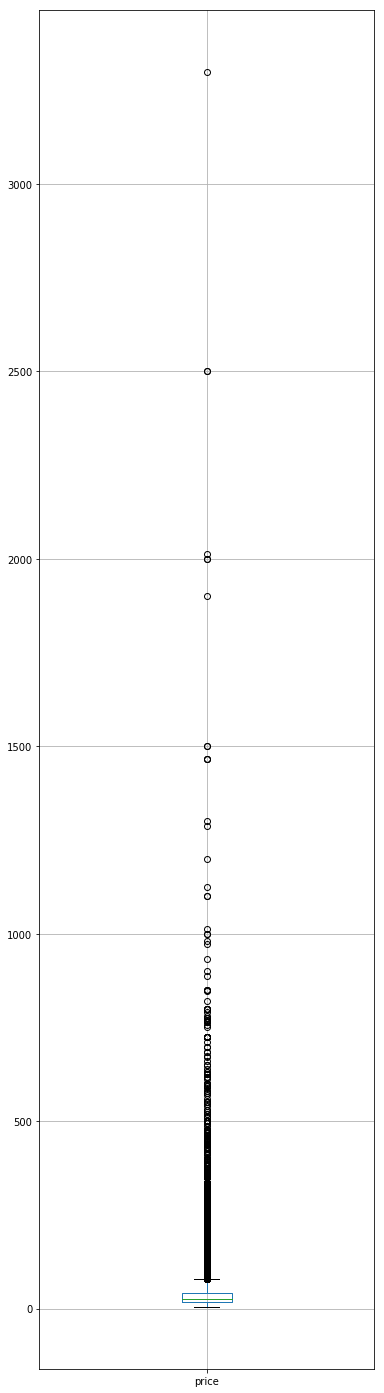

In [18]:
cname='price'
ansd=zty
ansd[cname]=pd.DataFrame(ans3)
d=DataFrame(ansd,columns=[cname])
print(d[cname].describe())
#直方图
plt.xlim(0,200)
d[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图
x3=np.sort(d[cname])
y3=np.arange(len(x2))/float(len(x2))
plt.plot(x3,y3)
plt.show()
#QQ图
stats.probplot(d[cname], dist="norm", plot=plt)
plt.show()
#盒图
d.boxplot(figsize=(6,25))
plt.show()

四种方法的可视化比较

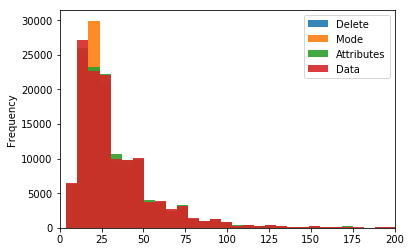

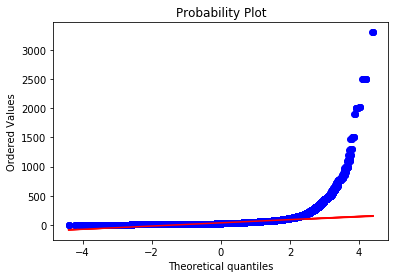

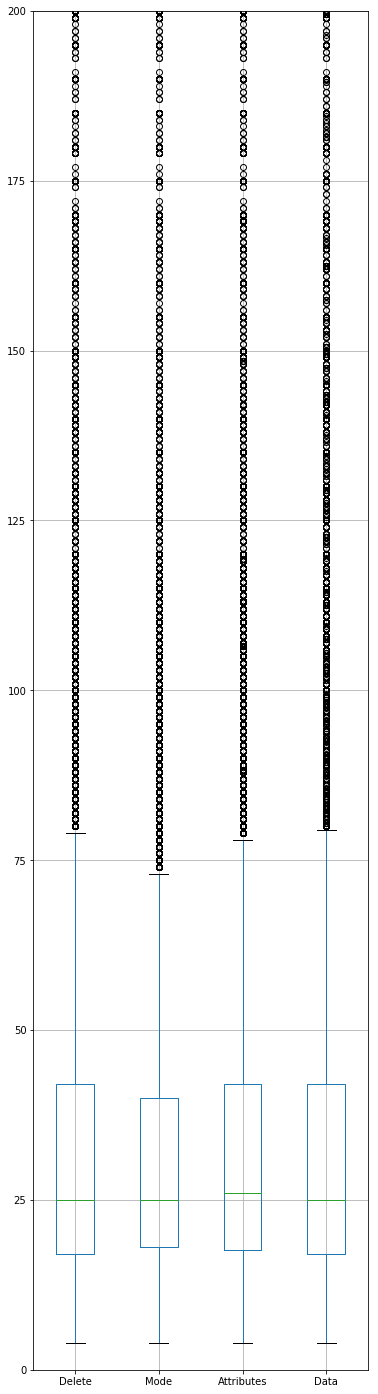

In [19]:
res = pd.concat([a,b,c,d],axis=1,ignore_index=True)
res.columns = ['Delete', 'Mode', 'Attributes', 'Data']
#直方图
res.plot.hist(alpha=0.9,bins=500)
plt.xlim(0,200)
plt.show()

#QQ图
stats.probplot(a[cname], dist="norm", plot=plt)
stats.probplot(b[cname], dist="norm", plot=plt)
stats.probplot(c[cname], dist="norm", plot=plt)
stats.probplot(d[cname], dist="norm", plot=plt)
plt.show()
#盒图
res.boxplot(figsize=(6,25))
plt.ylim(0,200)
plt.show()